/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6721 - loss: 0.6109 - val_accuracy: 0.7953 - val_loss: 0.4563
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8051 - loss: 0.4410 - val_accuracy: 0.7989 - val_loss: 0.4375
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.4271 - val_accuracy: 0.8016 - val_loss: 0.4316
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.4154 - val_accuracy: 0.7998 - val_loss: 0.4279
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8218 - loss: 0.4068 - val_accuracy: 0.7985 - val_loss: 0.4294
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4125 - val_accuracy: 0.8034 - val_loss: 0.4268
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.4090 - val_accuracy: 0.8039 - val_loss: 0.4249
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8236 - loss: 0.3932 - val_accuracy: 0.

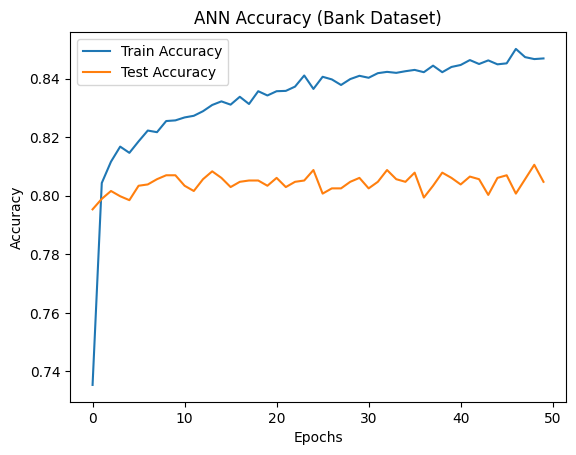

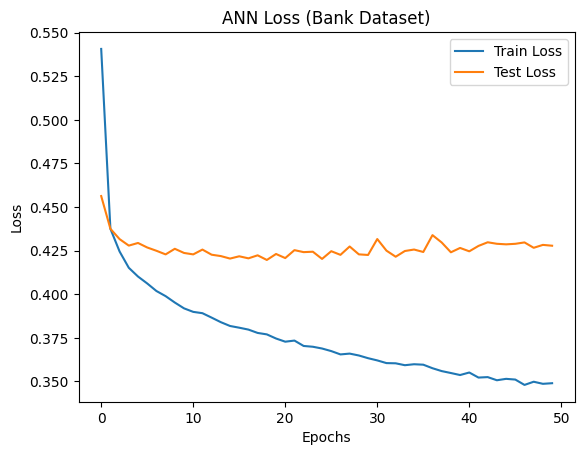

In [13]:
# ANN on Bank Marketing Dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("/content/bank.csv", sep=',')
df = df.apply(LabelEncoder().fit_transform)

X = df.drop("deposit", axis=1)
y = df["deposit"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("ANN Accuracy (Bank Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("ANN Loss (Bank Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()